Milestone 7: Sales Dashboard Project

In [7]:
import pandas as pd
df = pd.read_csv('../sales_data.csv')
#data table check
df.head()

,date,product,category,quantity,price,revenue
0,2024-01-01,Sunglasses,Accessories,2,1002,2004
1,2024-01-01,Watch,Accessories,4,4350,17400
2,2024-01-01,Sunglasses,Accessories,2,3830,7660
3,2024-01-03,Backpack,Accessories,2,4863,9726
4,2024-01-04,T-shirt,Apparel,2,3051,6102


In [8]:
df.dtypes

,0
date,object
product,object
category,object
quantity,int64
price,int64
revenue,int64


In [9]:
#📅converting date column to real date time format
df["date"] = pd.to_datetime(df["date"])
df.dtypes

,0
date,datetime64[ns]
product,object
category,object
quantity,int64
price,int64
revenue,int64


In [10]:
#setting date as an index in the table
df.set_index("date",inplace=True)

#format verification
df.head()

,product,category,quantity,price,revenue
date,,,,,
2024-01-01,Sunglasses,Accessories,2,1002,2004
2024-01-01,Watch,Accessories,4,4350,17400
2024-01-01,Sunglasses,Accessories,2,3830,7660
2024-01-03,Backpack,Accessories,2,4863,9726
2024-01-04,T-shirt,Apparel,2,3051,6102


In [11]:
# Group the data by month and sum the revenue
monthly_revenue = df["revenue"].resample("M").sum()

/tmp/ipython-input-11-3152136735.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = df["revenue"].resample("M").sum()


In [12]:
#group the data by month and sum the quantity
monthly_quantity = df["quantity"].resample("M").sum()

/tmp/ipython-input-12-2337425781.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_quantity = df["quantity"].resample("M").sum()


In [13]:
#month wise quantity and month wise revenue
print("📈Monthly revenue : ")
print(monthly_revenue)
print("\n📦Monthly quantity : ")
print(monthly_quantity)

📈Monthly revenue : 
date
2024-01-31    399700
2024-02-29    310107
2024-03-31    309987
2024-04-30    341449
2024-05-31    319695
2024-06-30    341879
Freq: ME, Name: revenue, dtype: int64

📦Monthly quantity : 
date
2024-01-31    146
2024-02-29    108
2024-03-31    126
2024-04-30    113
2024-05-31    142
2024-06-30    123
Freq: ME, Name: quantity, dtype: int64


/tmp/ipython-input-14-961952504.py:11: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


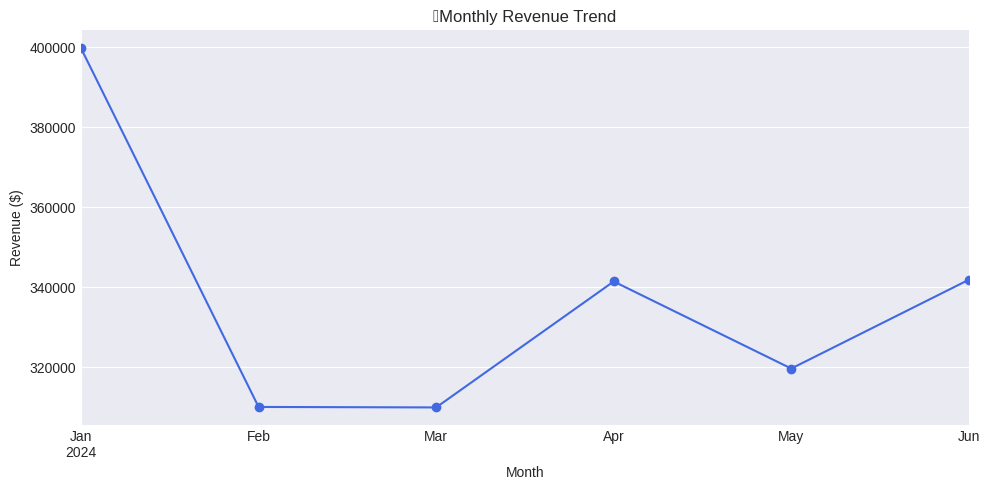

In [14]:
#visualization of data using matplotlib
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-darkgrid") # Changed to a valid seaborn style
plt.figure(figsize=(10,5))
monthly_revenue.plot(marker='o', color="royalblue")
plt.title("📈Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue ($)")
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-15-1743149650.py:8: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


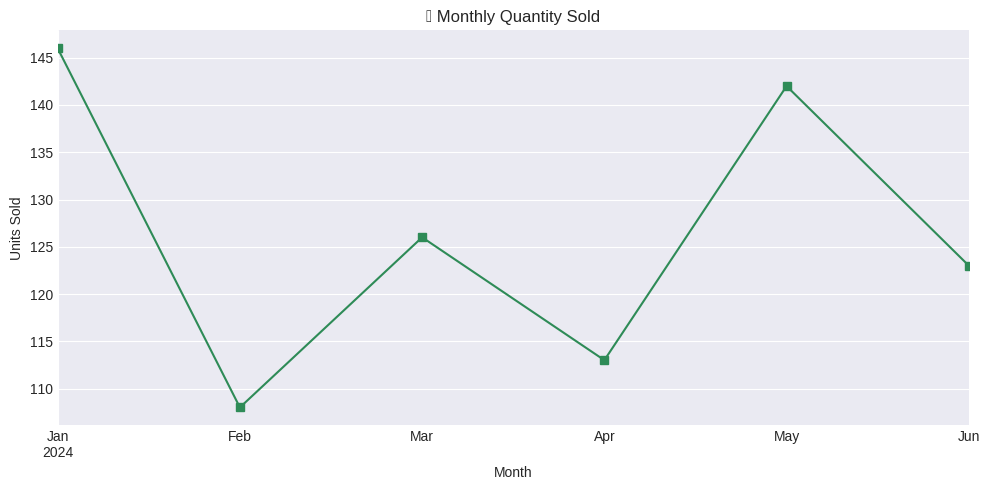

In [15]:
#graph of monthly quantity sold
plt.figure(figsize=(10, 5))
monthly_quantity.plot(marker='s', color='seagreen')
plt.title("📦 Monthly Quantity Sold")
plt.xlabel("Month")
plt.ylabel("Units Sold")
plt.grid(True)
plt.tight_layout()
plt.show()


In [18]:
#total revenue by product
df.groupby("product")["revenue"].sum()


,revenue
product,
Backpack,389227
Shoes,376704
Sunglasses,447490
T-shirt,479986
Watch,329410


In [21]:
#sort products by revenue
df.groupby("product")["revenue"].sum().sort_values(ascending=False)
product_revenue = df.groupby("product")["revenue"].sum().sort_values(ascending=False)



/tmp/ipython-input-22-4255030231.py:7: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-22-4255030231.py:7: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


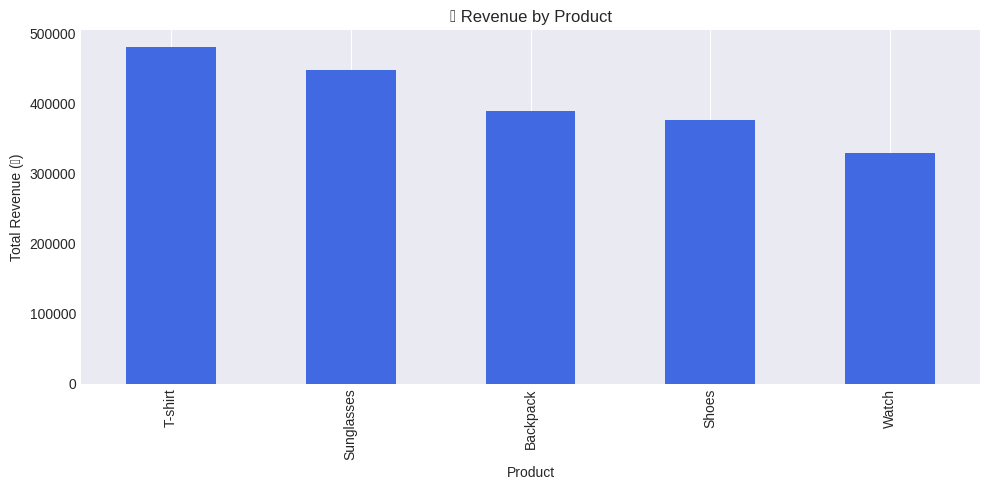

In [22]:
#plotting bar chart for product revenue
product_revenue.plot(kind="bar", color="royalblue", figsize=(10, 5))
plt.title("💰 Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Total Revenue (₹)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**REVENUE BY CATEGORY**

/tmp/ipython-input-23-1989347856.py:10: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-23-1989347856.py:10: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


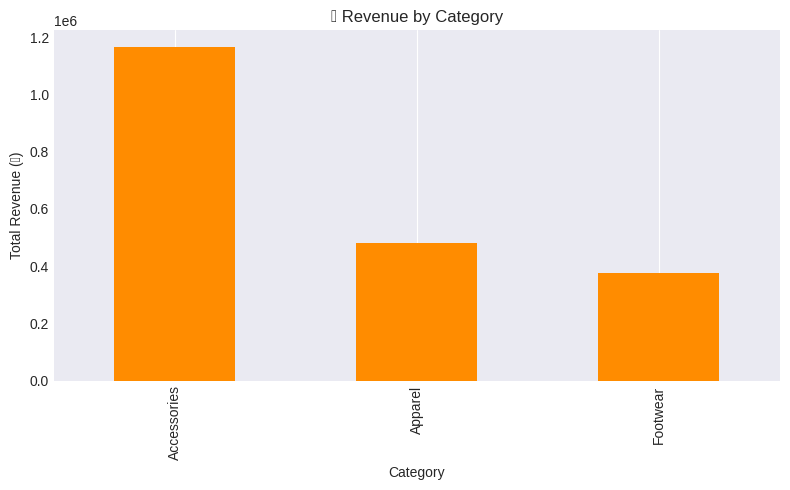

In [23]:
category_revenue = df.groupby("category")["revenue"].sum().sort_values(ascending=False)

#CHART

category_revenue.plot(kind="bar", color="darkorange", figsize=(8, 5))
plt.title("💰 Revenue by Category")
plt.xlabel("Category")
plt.ylabel("Total Revenue (₹)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()
